<a href="https://colab.research.google.com/github/prakhartiwari10/Open-CV-basic-Image-Processing-Operations/blob/main/Lane_detection_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
image = cv2.imread('test_image.jpg')

In [3]:
image.shape

(704, 1279, 3)

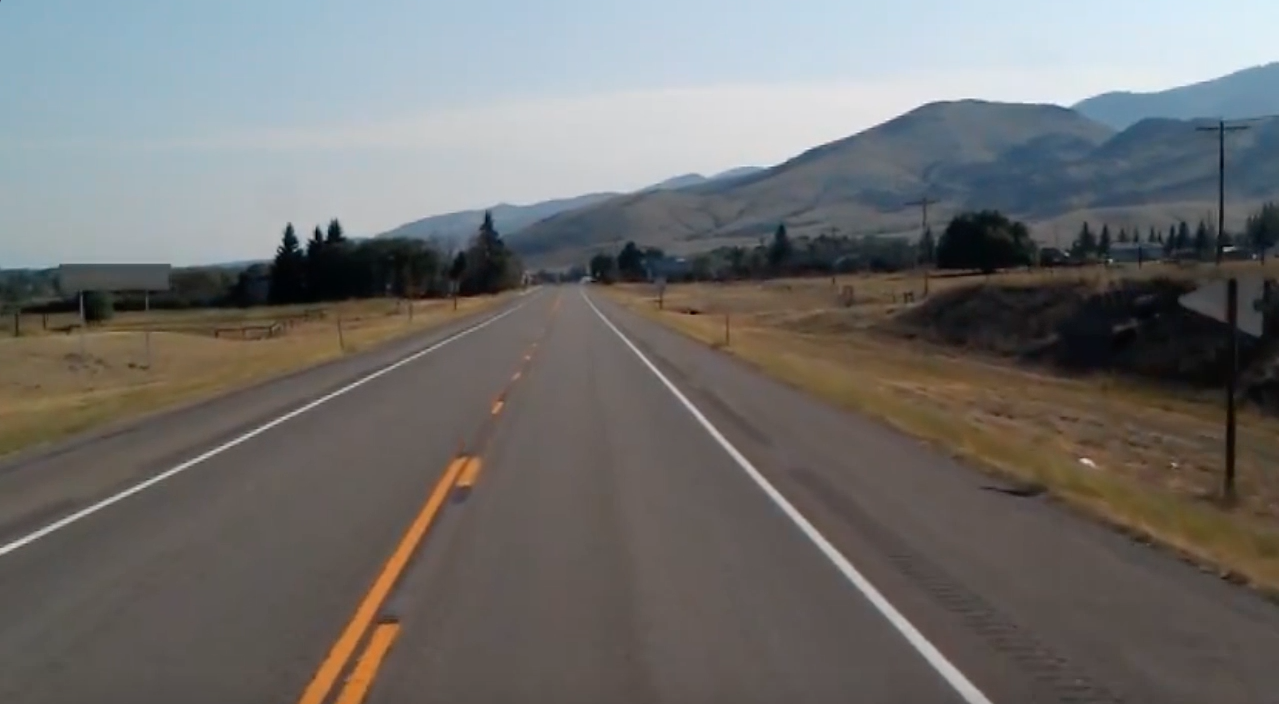

In [4]:
cv2_imshow(image)

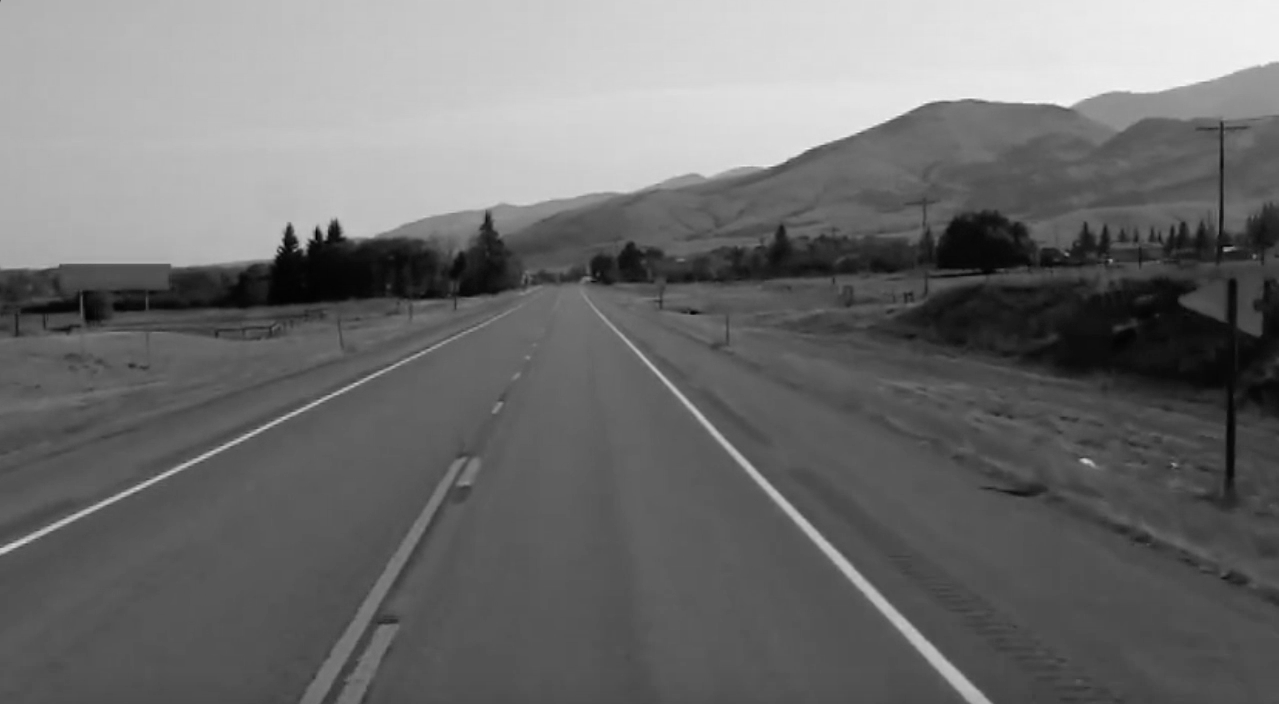

In [5]:
lane_image = np.copy(image)
gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
cv2_imshow(gray)

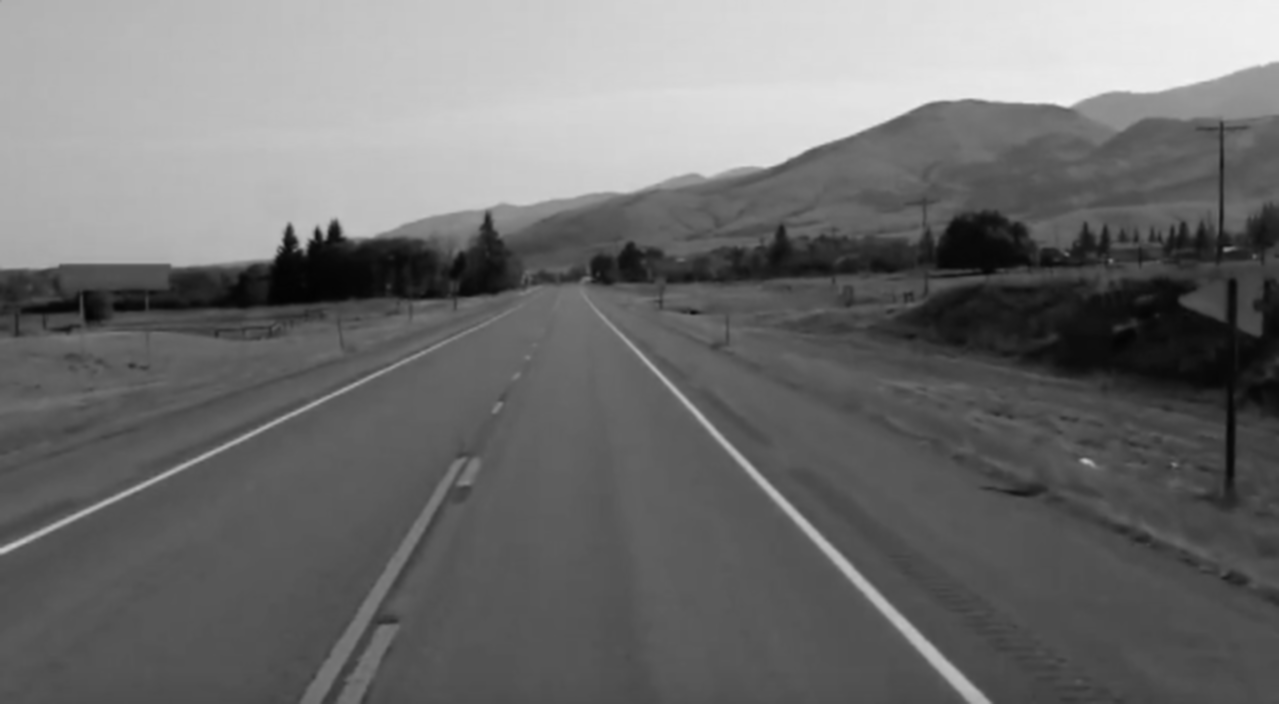

In [6]:
blur = cv2.GaussianBlur(gray, (5,5), 0)
cv2_imshow(blur)

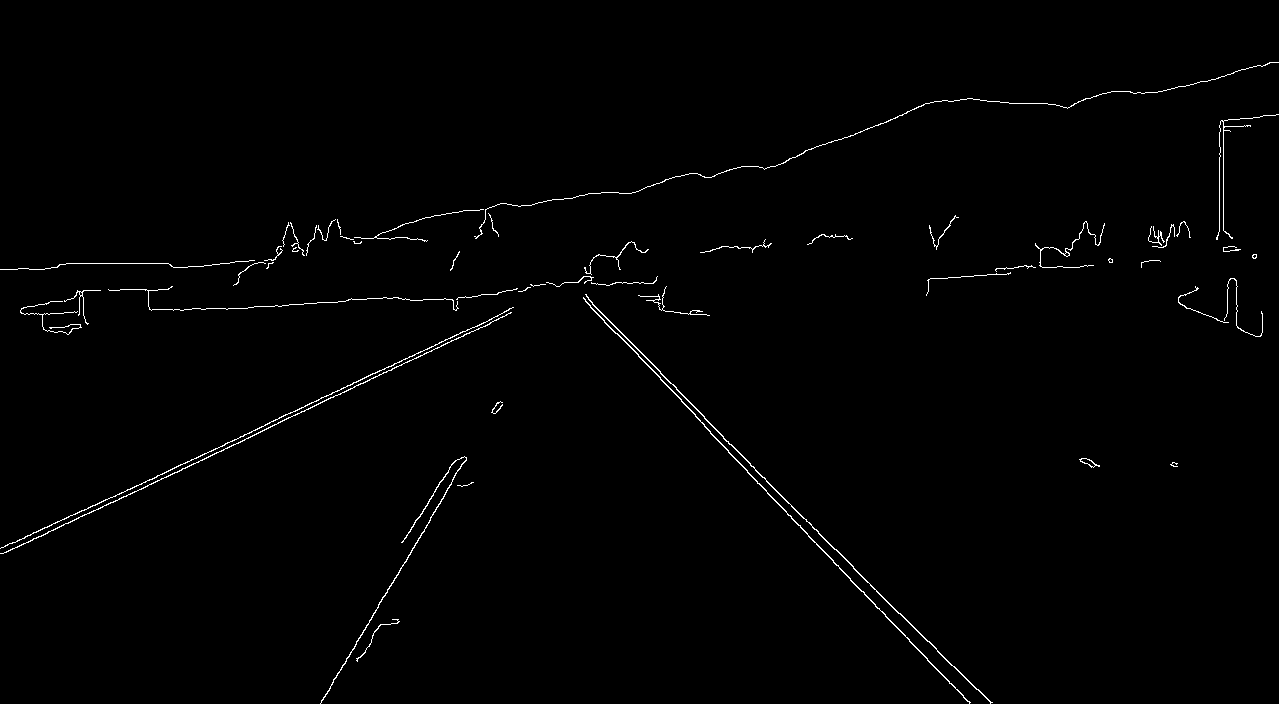

In [7]:
canny = cv2.Canny(blur, 50, 150)
cv2_imshow(canny)

In [8]:
def canny(image):
  gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  blur = cv2.GaussianBlur(gray, (5,5,), 0)
  canny = cv2.Canny(blur, 50, 150)
  return canny

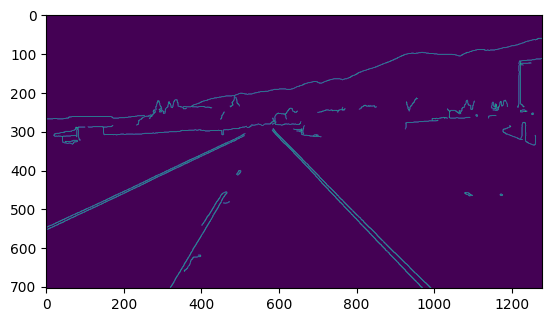

In [9]:
canny_image = canny(lane_image)
plt.imshow(canny_image)
plt.show()

In [10]:
def region_of_interest(image):
  height = image.shape[0]
  triangle = np.array([(200, height), (1100, height), (500, 250)])
  mask = np.zeros_like(image)
  cv2.fillPoly(mask, [triangle], 255)
  masked_image = cv2.bitwise_and(image, mask)
  return masked_image

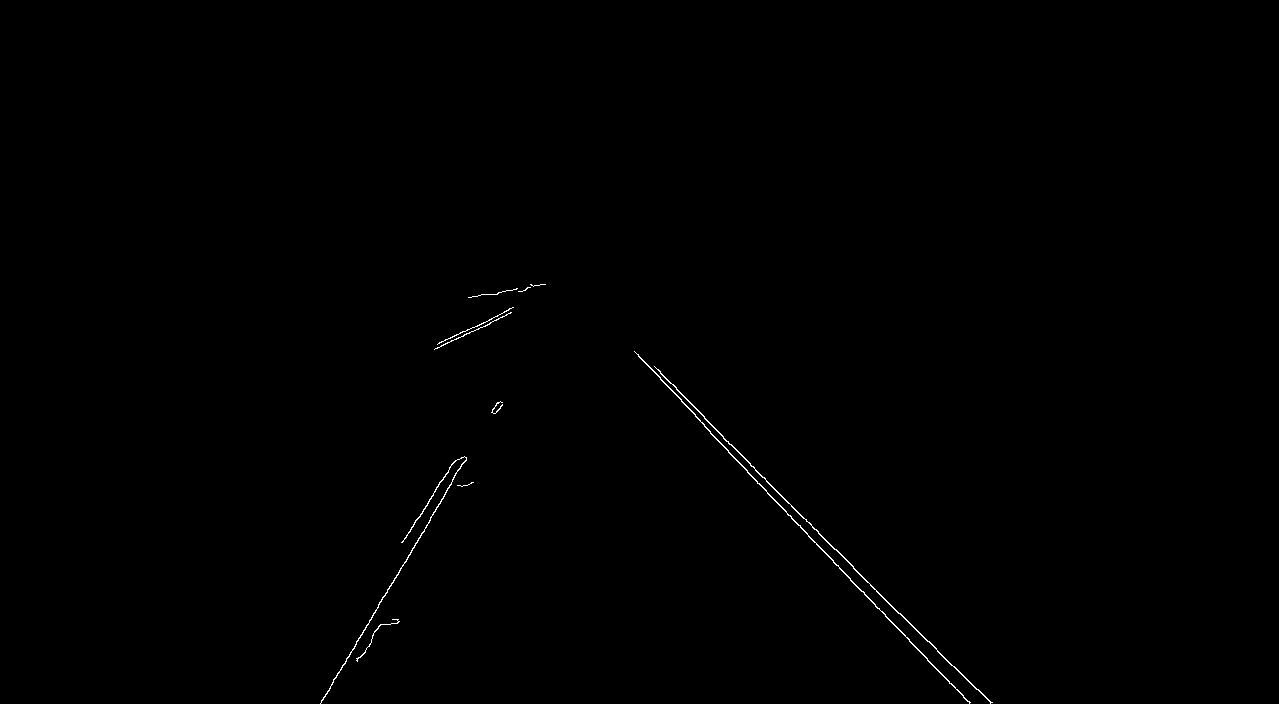

In [11]:
cropped_image = region_of_interest(canny_image)
cv2_imshow(cropped_image)

In [12]:
lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
lines

array([[[704, 418, 927, 641]],

       [[710, 433, 850, 578]],

       [[320, 703, 430, 519]],

       [[850, 580, 909, 639]],

       [[634, 351, 695, 414]],

       [[917, 648, 969, 703]],

       [[401, 542, 455, 460]],

       [[660, 373, 754, 467]],

       [[932, 645, 991, 702]],

       [[787, 514, 859, 588]]], dtype=int32)

In [13]:
def make_coordinates(image, line_parameters):
  slope, intercept = line_parameters
  y1 = image.shape[0]
  y2 = int((y1*3/5))
  x1 = int((y1-intercept)/slope)
  x2 = int((y2-intercept)/slope)
  return np.array([x1,y1,x2,y2])

In [14]:
def average_slope_intercept(image, lines):
  left_fit = []
  right_fit = []
  for line in lines:
    x1, y1, x2, y2 = line.reshape(4)
    parameters = np.polyfit((x1, x2), (y1, y2), 1)
    slope = parameters[0]
    intercept = parameters[1]
    if slope < 0:
      left_fit.append((slope, intercept))
    else:
      right_fit.append((slope, intercept))

  left_fit_average = np.average(left_fit, axis=0)
  right_fit_average = np.average(right_fit, axis = 0)
  left_line = make_coordinates(image, left_fit_average)
  right_line = make_coordinates(image, right_fit_average)
  return np.array([left_line, right_line])

In [15]:
def display_lines(image, lines):
  line_image = np.zeros_like(image)
  if lines is not None:
    for line in lines:
      x1, y1, x2, y2 = line
      cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)

  return line_image

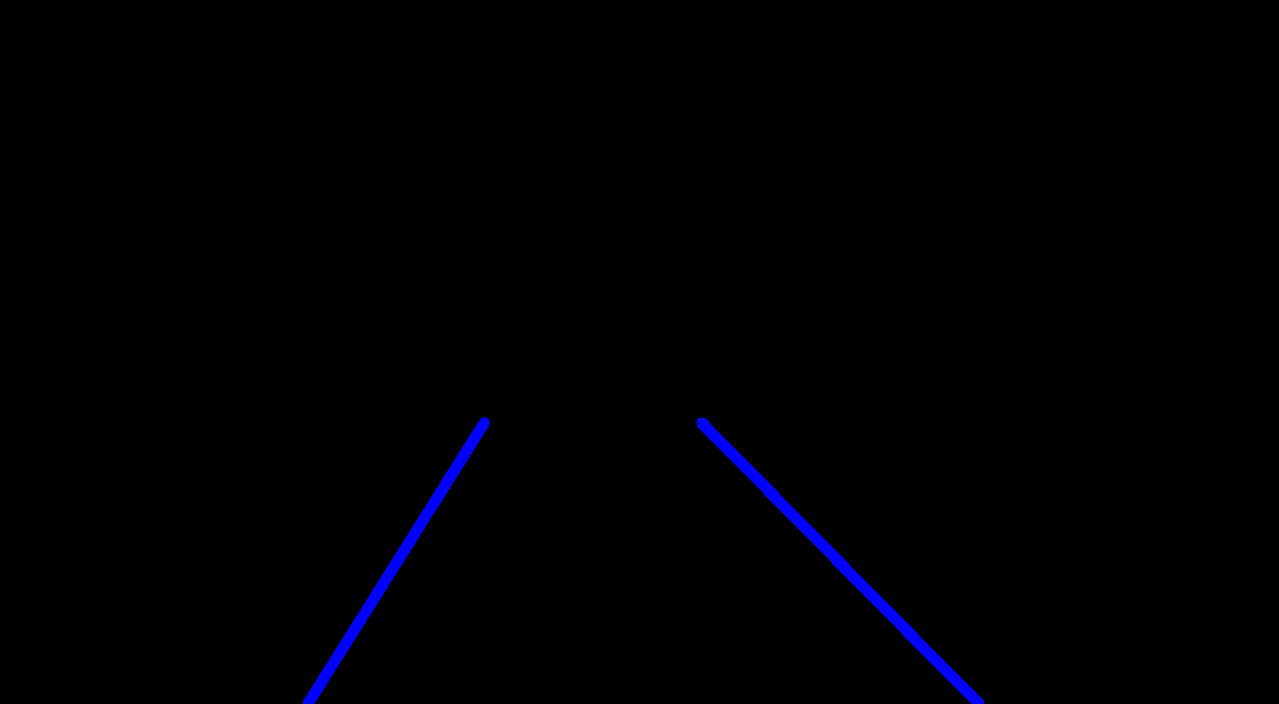

In [16]:
averaged_lines = average_slope_intercept(lane_image, lines)
line_image = display_lines(lane_image, averaged_lines)
cv2_imshow(line_image)

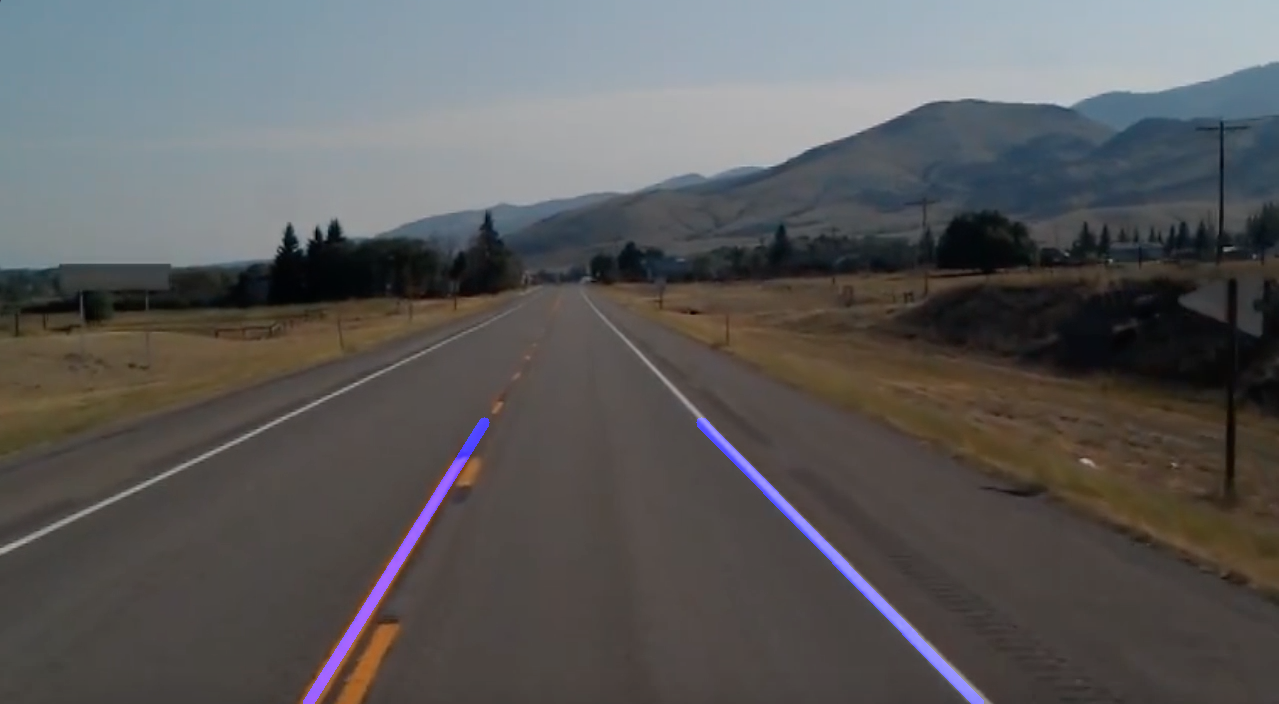

In [17]:
combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)
cv2_imshow(combo_image)

In [ ]:
cap = cv2.VideoCapture("test2.mp4")
while(cap.isOpened()):
  _, frame = cap.read()
  if frame is None:
    break
  canny_image = canny(frame)
  cropped_image = region_of_interest(canny_image)
  lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
  averaged_lines = average_slope_intercept(lane_image, lines)
  line_image = display_lines(lane_image, averaged_lines)
  combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)
  cv2_imshow(combo_image)
  time.sleep(0.001)